# AED - Prevendo expectativa de gols com IA

## Sumário
a) Importando as bibliotecas

b) Leitura dos arquivos

### 1. Quantidade de gols por minuto
### 2. Quantidade de gols por jogada
### 3. Chance de sair gol por jogada
### 4. Chance de sair gol de acordo com a última ação realizada antes do gol
### 5. Importância de se jogar fora ou dentro de casa 
### 6. Avaliando a temporada de um jogador de acordo com as suas chances criadas

---

#### a) Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### b) Leitura dos arquivos

In [2]:
df_xg = pd.read_csv('../data/intermediate/top5_xg.csv')
print(df_xg.shape)
df_xg.head()

(362781, 20)


,league,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,home_team,away_team,home_goals,away_goals,date,player_assisted,lastAction
0,Bundesliga,11,SavedShot,0.903,0.239,0.034118,Thomas Müller,h,224,OpenPlay,2014,RightFoot,5447,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,Philipp Lahm,Chipped
1,Bundesliga,17,SavedShot,0.852,0.277,0.030941,Arjen Robben,h,392,OpenPlay,2014,LeftFoot,5447,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,Philipp Lahm,Pass
2,Bundesliga,26,BlockedShot,0.803,0.277,0.021718,Arjen Robben,h,392,OpenPlay,2014,LeftFoot,5447,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,Holger Badstuber,Chipped
3,Bundesliga,28,SavedShot,0.871,0.324,0.050345,Thomas Müller,h,224,OpenPlay,2014,LeftFoot,5447,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,nobody,NaN
4,Bundesliga,29,SavedShot,0.918,0.531,0.111078,Robert Lewandowski,h,227,OpenPlay,2014,RightFoot,5447,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,Gianluca Gaudino,Chipped


In [3]:
df_xg.league.unique()

array(['Bundesliga', 'EPL', 'Serie_A', 'La_liga', 'Ligue_1'], dtype=object)

### 1. Análise da quantidade de gols por minuto

In [4]:
# Filtro do df
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'Serie_A')&(df_xg.season == 2015)]
df_filt = df_filt.groupby("minute")["result"].count().reset_index()

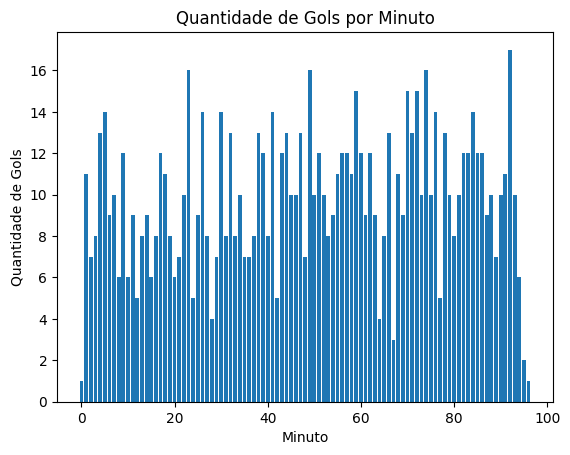

In [5]:
plt.bar(df_filt.minute, df_filt.result)

# Adicionar rótulos e título
plt.xlabel('Minuto')
plt.ylabel('Quantidade de Gols')
plt.title('Quantidade de Gols por Minuto')

# Exibir o gráfico
plt.show()

### 2. Análise da quantidade de gols por jogada

In [11]:
# Filtro do df
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'Serie_A')&(df_xg.season == 2017)]
df_filt = df_filt.groupby("situation")["result"].count().reset_index()

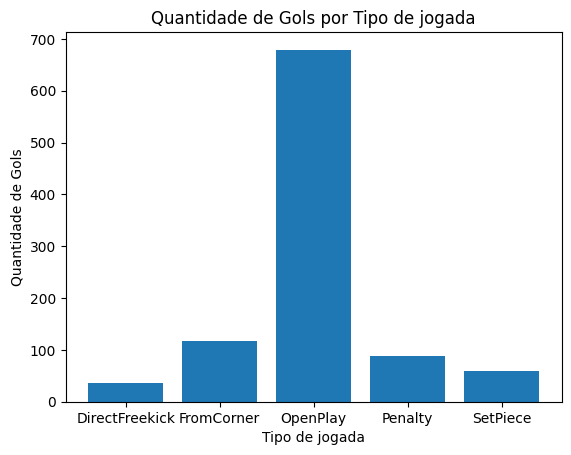

In [12]:
plt.bar(df_filt.situation, df_filt.result)

# Adicionar rótulos e título
plt.xlabel('Tipo de jogada')
plt.ylabel('Quantidade de Gols')
plt.title('Quantidade de Gols por Tipo de jogada')

# Exibir o gráfico
plt.show()

### 3. Análise da chance de sair gol por jogada

In [33]:
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'Ligue_1')&(df_xg.season == 2020)]
df_filt = df_filt.groupby("situation")["xG"].mean().reset_index()
df_filt

,situation,xG
0,DirectFreekick,0.062123
1,FromCorner,0.307496
2,OpenPlay,0.308322
3,Penalty,0.760083
4,SetPiece,0.345138


### 4. Análise da chance de sair gol de acordo com a última ação realizada antes do gol

In [34]:
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'Ligue_1')&(df_xg.season == 2020)]
df_filt = df_filt.groupby("lastAction")["xG"].mean().reset_index()
df_filt

,lastAction,xG
0,Aerial,0.144722
1,BallRecovery,0.217438
2,BallTouch,0.254311
3,BlockedPass,0.604156
4,Chipped,0.232386
5,CornerAwarded,0.145767
6,Cross,0.303071
7,Dispossessed,0.128795
8,HeadPass,0.315778
9,Interception,0.063662


### 5. Importância de se jogar fora ou dentro de casa 

In [121]:
df_filt_home = df_xg[(df_xg.h_a == 'h')&(df_xg.result == 'Goal')]
df_filt_away = df_xg[(df_xg.h_a == 'a')&(df_xg.result == 'Goal')]
print(df_filt_home.shape)
print(df_filt_away.shape)

(21599, 20)
(17088, 20)


### 6. Avaliando a temporada de um jogador de acordo com as suas chances criadas

In [118]:
df_filt = df_xg[(df_xg.league == 'Ligue_1')&(df_xg.season == 2021)]

##### Por gol

In [146]:
test = df_xg[df_xg.player == 'Victor Osimhen']
#test = test[test.result == 'Goal']
test.groupby("player")["xG"].sum().reset_index()

,player,xG
0,Victor Osimhen,39.753944


In [147]:
test = test[test.result == 'Goal']
test.groupby("player")["result"].count().reset_index()

,player,result
0,Victor Osimhen,37


##### Por assistência

In [155]:
test = df_xg[df_xg.player_assisted.isin(['Kevin De Bruyne'])]
#test = test[test.result == 'Goal']
test.groupby("player_assisted")["xG"].sum().reset_index()

,player_assisted,xG
0,Kevin De Bruyne,101.135446


In [156]:
test = test[test.result == 'Goal']
test.groupby("player_assisted")["result"].count().reset_index()

,player_assisted,result
0,Kevin De Bruyne,105


## Insights Gerados
- Kane>>>>Messi>>>>CR7